In [17]:
import pandas as pd
import torch
import os
import cv2
from torchvision import transforms, datasets
import json
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img = cv2.imread('data/attacks/00000_input_img.png')

In [35]:
imgT = preprocess(img)

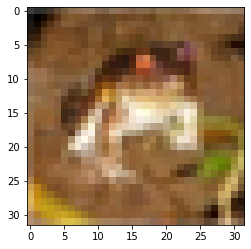

In [26]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


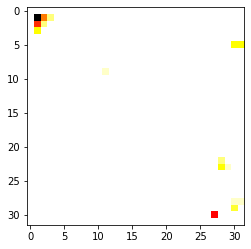

In [36]:
plt.imshow(imgT.permute(1, 2, 0))

In [99]:
with open('data/attacks/00000_params.txt') as f:
    current_list = f.readlines()
    print(current_list[2]+current_list[3])

Original dist: tensor([0.0025, 0.0025, 0.0045, 0.0046, 0.0035, 0.0030, 0.9721, 0.0023, 0.0025,
        0.0025], device='cuda:0', grad_fn=<SelectBackward>)



In [2]:
def extractData(step: int, filepath: str, outfilepath: str, isImage: bool) -> None:
    imgs = os.listdir(filepath)
    imgs.sort()

    for idx, filename in enumerate(imgs):
        if (idx - step) % 3 == 0 and isImage:
            img = cv2.imread(filepath + '/' + filename)
            cv2.imwrite(outfilepath + '/' + filename, img)
        ##majd jon a txt

    print('finished...')


In [109]:
extractData(0, 'data/attacks', 'data/training', True)

finished...


In [37]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((117.4333, 118.5367, 117.8493), (62.3127, 61.9546, 61.8706))
   # transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

In [4]:
def createImageDataset(path: str):
    imgs = os.listdir(path)
    imgs.sort()#sorting images so they will be in the right order, not necessary

    data = list()

    for idx, filename in enumerate(imgs):
        img = cv2.imread(path + '/' + filename)
        data.append(img)

    
    data = np.array(data) #convert list to np array
    data = torch.from_numpy(data).type(torch.FloatTensor) #convert np array to tensor
    data = data.view(3, 32, 32, data.shape[0])
    return data

In [5]:
data = createImageDataset('data/training')

In [39]:
data.shape

torch.Size([3, 32, 32, 4717])

In [38]:
data.view(3, -1).mean(dim=1), data.view(3, -1).std(dim=1)

(tensor([117.4333, 118.5367, 117.8493]), tensor([62.3127, 61.9546, 61.8706]))

torch.Size([3, 4830208])